In [1]:
import numpy as np
import cv2
import pandas as pd
from scipy import ndimage, misc
from matplotlib import pyplot as plt

In [69]:
pos = cv2.imread("C:\\Users\\Louis\\Desktop\\AS2_SemesterProject\\Concrete_Data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000)))
neg = cv2.imread("C:\\Users\\Louis\\Desktop\\AS2_SemesterProject\\Concrete_Data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000)))


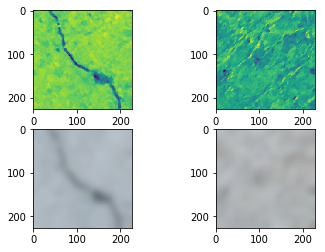

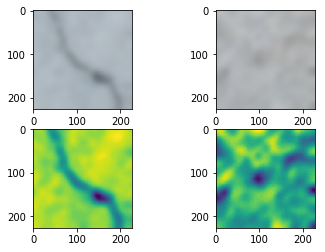

In [70]:
# Blur AFTER GrayScale Convertion
# --------- Converting to Gray Scale (Linear Transformation)
g_pos = cv2.cvtColor(pos, cv2.COLOR_BGR2GRAY)
g_neg = cv2.cvtColor(neg, cv2.COLOR_BGR2GRAY)
# ------- Blurring the Image (Gaussian Blur)
g_blur_pos = cv2.GaussianBlur(pos, (51, 51), 0)
g_blur_neg = cv2.GaussianBlur(neg, (51, 51), 0)

# Blur BEFORE GrayScale Convertion
# ------- Blurring the Image (Gaussian Blur)
blur_pos = cv2.GaussianBlur(pos, (51, 51), 0)
blur_neg = cv2.GaussianBlur(neg, (51, 51), 0)

# ------ Converting to Gray Scale (Linear Transformation)
blur_g_pos = cv2.cvtColor(blur_pos, cv2.COLOR_BGR2GRAY)
blur_g_neg = cv2.cvtColor(blur_neg, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(g_pos)
plt.subplot(2, 2, 2)
plt.imshow(g_neg)
plt.subplot(2, 2, 3)
plt.imshow(g_blur_pos)
plt.subplot(2, 2, 4)
plt.imshow(g_blur_neg)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(blur_pos)
plt.subplot(2, 2, 2)
plt.imshow(blur_neg)
plt.subplot(2, 2, 3)
plt.imshow(blur_g_pos)
plt.subplot(2, 2, 4)
plt.imshow(blur_g_neg)

In [71]:
# Laplacian 
# Sequence of Actions:      
#                             Blurring     --->    Gray Scale Conversion    --->     Laplacian   --> 

# Creating the Laplacian
#     # Laplace directly from colour images
laplace_pos = cv2.Laplacian(blur_pos, cv2.CV_64F)
laplace_neg = cv2.Laplacian(blur_neg, cv2.CV_64F)

#     - Laplace from the blurred images which has been converted to gray scale
laplace_g_pos = cv2.Laplacian(g_pos, cv2.CV_64F)
laplace_g_neg = cv2.Laplacian(g_neg, cv2.CV_64F)


# THresholding the gradient Magnitude and from this converting to binary image
th_lap_pos = laplace_g_pos.copy()
th_lap_pos[abs(th_lap_pos) < np.amax(np.unique(laplace_g_pos))*0.2] = 0
th_lap_pos[abs(th_lap_pos) >= np.amax(np.unique(laplace_g_pos))*0.2] = 1

# Morphological Operations on the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
img_close = cv2.morphologyEx(th_lap_pos, cv2.MORPH_CLOSE, kernel)
# img_open = cv2.morphologyEx(laplace_G_neg, cv2.MORPH_OPEN, kernel)



cv2.imshow("Colour Pos", blur_pos )
# cv2.imshow("Colour Neg", neg )
# cv2.imshow("Gray Pos", g_pos)
# cv2.imshow("Gray Neg", g_neg)
# cv2.imshow("Laplacian Colour Pos", laplace_pos)
# cv2.imshow("Laplacian Colour Neg", laplace_neg)
cv2.imshow("Laplacian Gray Pos", laplace_g_pos)
# cv2.imshow("Laplacian Gray Neg", laplace_G_neg)
cv2.imshow("gradients", th_lap_pos)
cv2.imshow("Open", img_close)


# print(np.unique(laplace_g_pos))
# print(np.unique(laplace_g_neg))


cv2.waitKey(0)
cv2.destroyAllWindows()





In [72]:
# Laplacian 

# Sequence of Actions:      
#                             Blurring     --->    Gray Scale Conversion    --->     Laplacian

# Creating the Laplacian
#     # Laplace directly from colour images
laplace_pos = cv2.Laplacian(blur_pos, cv2.CV_64F)
laplace_neg = cv2.Laplacian(blur_neg, cv2.CV_64F)

#     - Laplace from the blurred images which has been converted to gray scale
laplace_G_pos = cv2.Laplacian(g_pos, cv2.CV_64F)
laplace_G_neg = cv2.Laplacian(g_neg, cv2.CV_64F)

# Convert to only positive gradients
th_lap_pos = laplace_g_pos.copy()
th_lap_pos[abs(th_lap_pos) < np.amin(np.unique(laplace_g_pos))*(-0.3)] = 1
#th_lap_pos[abs(th_lap_pos) >= np.amax(np.unique(laplace_G_pos))*0.2] = 1

# Morphological Operations on the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
img_erode = cv2.morphologyEx(th_lap_pos, cv2.MORPH_ERODE, kernel)
# img_open = cv2.morphologyEx(laplace_G_neg, cv2.MORPH_OPEN, kernel)



cv2.imshow("Colour Pos", pos )
cv2.imshow("Laplacian Gray Pos", laplace_g_pos)
cv2.imshow("gradients", th_lap_pos)
cv2.imshow("Erode", img_erode)

print(np.unique(laplace_g_pos))
print(np.unique(laplace_g_neg))


cv2.waitKey(0)
cv2.destroyAllWindows()





[-128.  -95.  -89.  -82.  -79.  -75.  -73.  -71.  -67.  -65.  -64.  -61.
  -60.  -59.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -49.  -48.  -47.
  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.
  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.
  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.
  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.
    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.
   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.
   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.
   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.
   50.   51.   52.   53.   54.   55.   57.   59.   60.   61.   62.   63.
   66.   68.   73.   74.   75.   79.  100.  121.]
[-95. -84. -77. -76. -73. -69. -66. -65. -62. -61. -60. -59. -58. -57.
 -56. -55. -54. -53. -52. -51. -50. -49. -48. -47. -46. -45. -44. -43.
 -42.

In [73]:
# Gradients in X and Y direction on RGB and Gray Scale

# Size can only be uneven
size = 1

# X-direction
sobelX_RGB_pos = cv2.Sobel(blur_pos, cv2.CV_64F, 1, 0, ksize=size)
sobelX_RGB_neg = cv2.Sobel(blur_neg, cv2.CV_64F, 1, 0, ksize=size)
sobelX_Gray_pos = cv2.Sobel(blur_g_pos, cv2.CV_64F, 1, 0, ksize=size)
sobelX_Gray_neg = cv2.Sobel(blur_g_neg, cv2.CV_64F, 1, 0, ksize=size)

# Y-direction
sobelY_RGB_pos = cv2.Sobel(blur_pos, cv2.CV_64F, 0, 1, ksize=size)
sobelY_RGB_neg = cv2.Sobel(blur_neg, cv2.CV_64F, 0, 1, ksize=size)
sobelY_Gray_pos = cv2.Sobel(blur_g_pos, cv2.CV_64F, 0, 1, ksize=size)
sobelY_Gray_neg = cv2.Sobel(blur_g_neg, cv2.CV_64F, 0, 1, ksize=size)

# cv2.imshow("Colour Pos", pos )
# cv2.imshow("Colour Neg", neg )
cv2.imshow("Colour SobelX Pos", sobelX_RGB_pos)
cv2.imshow("Colour SobelX Neg", sobelX_RGB_neg)
cv2.imshow("Gray SobelX Pos", sobelX_Gray_pos)
cv2.imshow("Gray SobelX Neg", sobelX_Gray_neg)

cv2.imshow("Colour SobelY Pos", sobelY_RGB_pos)
cv2.imshow("Colour SobelY Neg", sobelY_RGB_neg)
cv2.imshow("Gray SobelY Pos", sobelY_Gray_pos)
cv2.imshow("Gray SobelY Neg", sobelY_Gray_neg)

print(sobelX_Gray_pos.shape)
print(sobelX_RGB_pos.shape)
print(np.unique(sobelX_Gray_pos))


cv2.waitKey(0)
cv2.destroyAllWindows()

(227, 227)
(227, 227, 3)
[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [7]:
# Gauss Blur ---> Gray Scale ---> Laplacian 
# For Negative and Positive

blur_pos = cv2.GaussianBlur(pos, (21, 21), 0)
gray_pos = cv2.cvtColor(blur_pos, cv2.COLOR_BGR2GRAY)
dst_pos = cv2.Laplacian(gray_pos, cv2.CV_64F, 31)

blur_neg = cv2.GaussianBlur(neg, (21, 21), 0)
gray_neg = cv2.cvtColor(blur_neg, cv2.COLOR_BGR2GRAY)
dst_neg = cv2.Laplacian(gray_neg, cv2.CV_64F, 31)



cv2.imshow("BLUR POS", blur_pos)
cv2.imshow("Gray POS", gray_pos)
cv2.imshow("distance POS", dst_pos)

cv2.imshow("BLUR NEG", blur_neg)
cv2.imshow("Gray NEG", gray_neg)
cv2.imshow("distance Neg", dst_neg)



cv2.waitKey(0)
cv2.destroyAllWindows()

In [75]:
# Canny Edge Detector

edge_col1 = cv2.Canny(pos, 100, 100)
edge_col2 = cv2.Canny(neg, 100, 100)

cv2.imshow("Edge Pos", edge_col1)
cv2.imshow("Edge Neg", edge_col2)

print(np.unique(edge_col1))
print(np.unique(edge_col2))

cv2.waitKey(0)
cv2.destroyAllWindows()

[  0 255]
[  0 255]


20
5
20
9
48
4
119
8


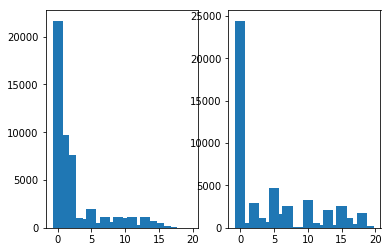

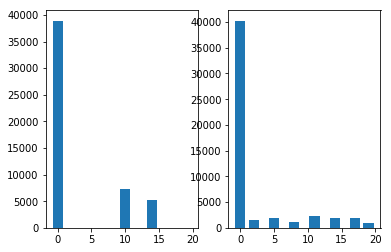

In [51]:
# HISTOGRAM OF ORIENTED GRADIENTS
number_bins = 20



############ POSITIVE IMAGES ############################
# Calculating the gradients
sobelX_pos = cv2.Sobel(blur_g_pos, cv2.CV_32F, 1, 0, ksize=1)
sobelY_pos = cv2.Sobel(blur_g_pos, cv2.CV_32F, 0, 1, ksize=1)

# Using vector tool to find the magnitudes and the angles
mag_pos, angle_pos = cv2.cartToPolar(sobelX_pos, sobelY_pos, angleInDegrees=True)

# Making the histograms
hist_mag_pos = np.histogram(mag_pos, bins=number_bins)
hist_angle_pos = np.histogram(angle_pos, bins=number_bins)



############ NEGATIVE IMAGES ############################
# Calculating t_poshe gradients
sobelX_neg = cv2.Sobel(blur_g_neg, cv2.CV_32F, 1, 0, ksize=1)
sobelY_neg = cv2.Sobel(blur_g_neg, cv2.CV_32F, 0, 1, ksize=1)

# Using vector tool to find the magnitudes and the angles
mag_neg, angle_neg = cv2.cartToPolar(sobelX_neg, sobelY_neg, angleInDegrees=True)

# Making the histograms
hist_mag_neg = np.histogram(mag_neg, bins=number_bins)
hist_angle_neg = np.histogram(angle_neg, bins=number_bins)






array1 = np.arange(len(hist_mag_pos[0]))
array2 = np.arange(len(hist_mag_neg[0]))


plt.figure()
plt.subplot(1, 2, 1)
plt.bar(array1, hist_mag_pos[0], width=1.5)
plt.subplot(1, 2, 2)
plt.bar(array1, hist_angle_pos[0], width=1.5)

plt.figure()
plt.subplot(1, 2, 1)
plt.bar(array1, hist_mag_neg[0], width=1.5)
plt.subplot(1, 2, 2)
plt.bar(array1, hist_angle_neg[0], width=1.5)


print(len(np.unique(hist_mag_pos[0])))
print(len(np.unique(hist_mag_neg[0])))
print(len(np.unique(hist_angle_pos[0])))
print(len(np.unique(hist_angle_neg[0])))

print(len(np.unique(mag_pos)))
print(len(np.unique(mag_neg)))
print(len(np.unique(angle_pos)))
print(len(np.unique(angle_neg)))

In [26]:

# Dataset Load function
# Selects, Blur, and Grayyscales 100 negative and positive images
def get_train_data_gradients(nsamples=100):

#     pos_blur = [cv2.GaussianBlur(pos, (51, 51), 0) for i in range(nsamples)]
#     pos_blur = [cv2.GaussianBlur(pos, (51, 51), 0) for i in range(nsamples)]

#     data_pos = [cv2.cvtColor(pos_blur, cv2.COLOR_BGR2GRAY) for i in range(nsamples)]
#     data_neg = [cv2.cvtColor(neg_blur, cv2.COLOR_BGR2GRAY) for i in range(nsamples)]
    
#     data_pos = [cv2.cvtColor(cv2.GaussianBlur(cv2.imread("C:\\Users\\Louis\\Desktop\\AS2_SemesterProject\\Concrete_Data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000))), (51, 51), 0), cv2.COLOR_BGR2GRAY) for i in range(nsamples)]
#     data_neg = [cv2.cvtColor(cv2.GaussianBlur(cv2.imread("C:\\Users\\Louis\\Desktop\\AS2_SemesterProject\\Concrete_Data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000))), (51, 51), 0), cv2.COLOR_BGR2GRAY) for i in range(nsamples)]
    
    data_pos = [cv2.cvtColor(cv2.GaussianBlur(cv2.imread("C:\\Users\\Louis\\Desktop\\AS2_SemesterProject\\Concrete_Data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000))), (51, 51), 0), cv2.COLOR_BGR2GRAY) for i in range(nsamples)]
    data_neg = [cv2.GaussianBlur(cv2.cvtColor(cv2.GaussianBlur(cv2.imread("C:\\Users\\Louis\\Desktop\\AS2_SemesterProject\\Concrete_Data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000))), (51, 51), 0), cv2.COLOR_BGR2GRAY), (51, 51), 0) for i in range(nsamples)]

    
    return data_pos, data_neg


In [ ]:
# Calculates and returns the number of UNIQUE VALUES for:
# Gradient Magnitudes and Angles for all images.

def gradients(img):
    number_bins = 40

    ############ POSITIVE IMAGES ############################
    # Calculating the gradients
    sobelX_pos = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    sobelY_pos = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

    # Using vector tool to find the magnitudes and the angles
    mag, angle = cv2.cartToPolar(sobelX_pos, sobelY_pos, angleInDegrees=True)

    # Making the histograms
    hist_mag = np.histogram(mag, bins=number_bins)
    hist_angle = np.histogram(angle, bins=number_bins)
    
    
    # This Is the Version where we compress the values into bins
    un_mag = len(np.unique(hist_mag[0]))
    un_angle = len(np.unique(hist_angle[0]))
    
    # This is the version where we do not compress values into bins
#     un_mag = len(np.unique(mag))
#     un_angle = len(np.unique(angle))
    
    return un_mag, un_angle


In [59]:
SAMPLE_SIZE = 5 00
pos, neg = get_train_data_gradients(SAMPLE_SIZE)

In [65]:
un_mag_pos = []
un_mag_neg = []
un_angle_pos = []
un_angle_neg = []

for i in range (SAMPLE_SIZE):
    # Positive Images
    mag, angle = gradients(pos[i])
    un_mag_pos.append(mag)
    un_angle_pos.append(angle)
    
    # Negative Images
    mag, angle = gradients(neg[i])
    un_mag_neg.append(mag)
    un_angle_neg.append(angle)
    

results_mag = np.concatenate((un_mag_pos, un_mag_neg), 0)
results_angle = np.concatenate((un_angle_pos, un_angle_neg), 0)

# print(results_mag)
# print(len(results_mag))

In [66]:
# Create labels
label_neg = np.array(np.zeros(len(un_mag_neg), dtype = int))
label_pos = np.array(np.ones(len(un_mag_pos), dtype = int))
labels = np.concatenate((label_pos, label_neg), 0)



In [67]:
# Create dataframe

# Yellow = Positive, Black = Negative
df = pd.DataFrame(np.column_stack([results_mag, results_angle, labels]), 
                  index=range(SAMPLE_SIZE*2), 
                  columns=['Mag', 'Angle', 'label'])

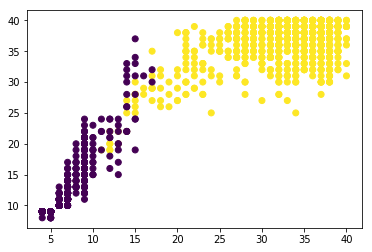

In [68]:
plt.scatter(df.Mag, df.Angle, c=df.label)